In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

In [3]:
aviationData = pd.read_csv('final.csv')
aviationData.head()

,Unnamed: 0,Altitude,Injury.Severity,Aircraft.Damage,Number.of.Engines,Engine.Type,FAR.Description,Purpose.of.Flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.Phase.of.Flight,Total.Passengers,Total.Injuries
0,0,41.2,NON-FATAL,SUBSTANTIAL,1,RECIPROCATING,PART 91: GENERAL AVIATION,PERSONAL,0,0,0,1,VMC,TAKEOFF,1,0
1,1,321.3,FATAL,DESTROYED,1,RECIPROCATING,PART 91: GENERAL AVIATION,PERSONAL,2,0,0,0,VMC,TAKEOFF,2,2
2,2,10.8,FATAL,DESTROYED,2,TURBO PROP,PART 91: GENERAL AVIATION,EXECUTIVE/CORPORATE,5,2,2,0,IMC,TAKEOFF,9,9
3,3,10970.6,NON-FATAL,SUBSTANTIAL,1,RECIPROCATING,PART 91: GENERAL AVIATION,PERSONAL,0,0,0,2,VMC,CRUISE,2,0
4,4,271.5,NON-FATAL,SUBSTANTIAL,2,RECIPROCATING,PART 91: GENERAL AVIATION,PERSONAL,0,0,0,2,VMC,APPROACH,2,0


In [6]:
elevationData = pd.Series([])

#Average airplane height in the world is about 10972.8 metres
#Therefore, we subtracted the elevation of ground from sea level ("Altitude"), from the average airplane height
#to get the estimated elevation from ground. 

for i in range(len(aviationData)):
    elevationData[i] = 10972.8 - aviationData['Altitude'][i]
    
aviationData['Elevation.Height'] = elevationData
aviationData.head()

,Unnamed: 0,Altitude,Injury.Severity,Aircraft.Damage,Number.of.Engines,Engine.Type,FAR.Description,Purpose.of.Flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.Phase.of.Flight,Total.Passengers,Total.Injuries,Elevation.Height
0,0,41.2,NON-FATAL,SUBSTANTIAL,1,RECIPROCATING,PART 91: GENERAL AVIATION,PERSONAL,0,0,0,1,VMC,TAKEOFF,1,0,10931.6
1,1,321.3,FATAL,DESTROYED,1,RECIPROCATING,PART 91: GENERAL AVIATION,PERSONAL,2,0,0,0,VMC,TAKEOFF,2,2,10651.5
2,2,10.8,FATAL,DESTROYED,2,TURBO PROP,PART 91: GENERAL AVIATION,EXECUTIVE/CORPORATE,5,2,2,0,IMC,TAKEOFF,9,9,10962.0
3,3,10970.6,NON-FATAL,SUBSTANTIAL,1,RECIPROCATING,PART 91: GENERAL AVIATION,PERSONAL,0,0,0,2,VMC,CRUISE,2,0,2.2
4,4,271.5,NON-FATAL,SUBSTANTIAL,2,RECIPROCATING,PART 91: GENERAL AVIATION,PERSONAL,0,0,0,2,VMC,APPROACH,2,0,10701.3


In [7]:
# Extract Response and Predictors
y = pd.DataFrame(aviationData["Aircraft.Damage"])
X = pd.DataFrame(aviationData[["Elevation.Height", "Total.Passengers"]])

In [8]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (1153, 1) (1153, 2)
Test Set  : (289, 1) (289, 2)


In [9]:
# Summary Statistics for Predictors
X_train.describe()

,Elevation.Height,Total.Passengers
count,1153.000000,1153.000000
mean,9001.486210,1.840416
std,3646.901073,1.295236
min,0.800000,1.000000
25%,9747.300000,1.000000
50%,10630.500000,2.000000
75%,10852.500000,2.000000
max,10972.800000,14.000000


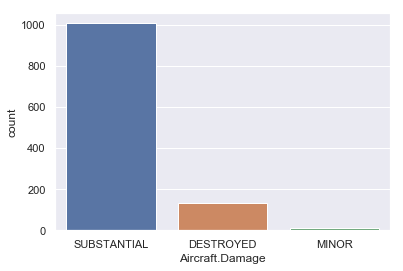

In [10]:
# Draw the distribution of Response
sb.countplot(y_train["Aircraft.Damage"])

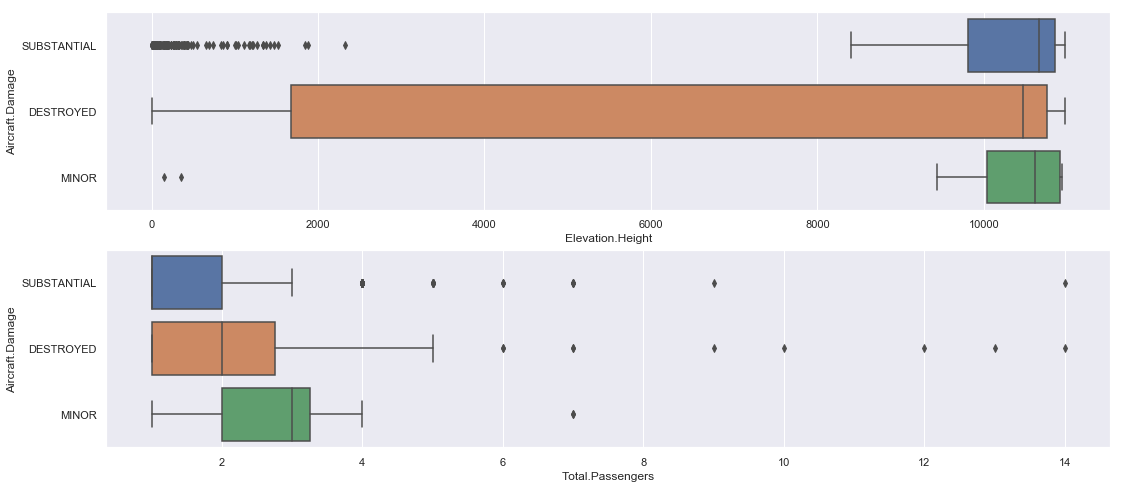

In [11]:
# Relationship between Response and the Predictors
trainDF = pd.concat([y_train, X_train.reindex(index=y_train.index)], sort = False, axis = 1)

f, axes = plt.subplots(2, 1, figsize=(18, 8))

count = 0
for var in X_train:
    sb.boxplot(x = var, y = "Aircraft.Damage", data = trainDF, orient = "h", ax = axes[count])
    count += 1

In [12]:
from sklearn.tree import DecisionTreeClassifier
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

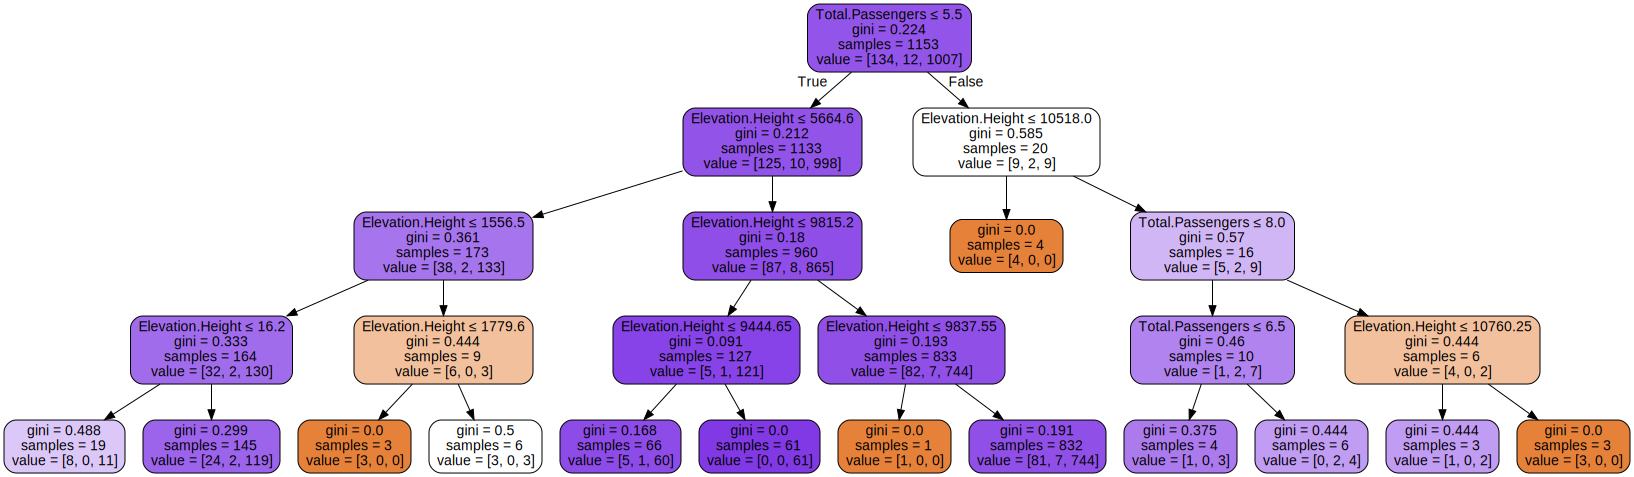

In [13]:
# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8829141370338248

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8858131487889274



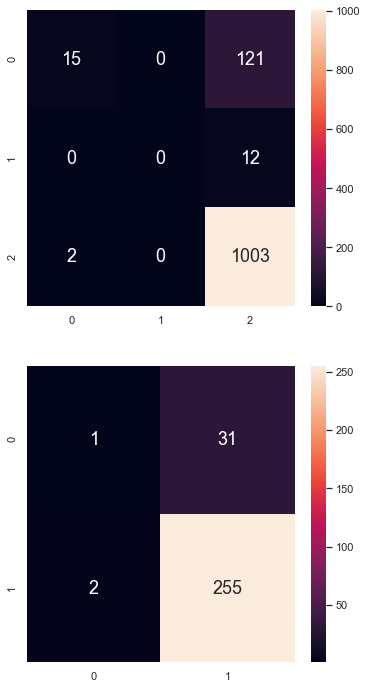

In [32]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(2, 1, figsize=(6, 12))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])